In [1]:
#I'm not sure if all of these need to be included but I am importing them all just to be safe.
from __future__ import division
import pandas as pd
import numpy as np
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import requests
from sklearn.feature_extraction.text import CountVectorizer
import math
from bs4 import BeautifulSoup
import requests
from nltk.corpus import stopwords
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
import PyPDF2

In [35]:
#Import all books into a list object. 
#Need to look into creating a function to do this.
pathname = 'C:/Users/dmdal/OneDrive/Documents/TextMining/Books_for_Project/'

pdf_Austen = open(pathname+'Austen_Persuasion.pdf','rb')     #'rb' for read binary mode
pdfReader = PyPDF2.PdfFileReader(pdf_Austen)
pages = pdfReader.numPages
#print(type(pages))
Austen_text = []
print(type(Austen_text))

i = 1
while i < pages: 
    pageObj_Austen = pdfReader.getPage(i)
    text= pageObj_Austen.extractText()
    text = [text]
    #text = ''.join(row.findAll(text=True)) 
    #data = [str(text.strip())] 
    Austen_text = Austen_text + text
    i = i+1
    
pdf_Austen2 = open(pathname+'Austen_Pride_Prejudice.pdf','rb')     #'rb' for read binary mode
pdfReader = PyPDF2.PdfFileReader(pdf_Austen2)
pages = pdfReader.numPages
#print(type(pages))
Austen2_text = []
print(type(Austen2_text))

i = 9
while i < pages: 
    pageObj_Austen2 = pdfReader.getPage(i)
    text= pageObj_Austen2.extractText()
    text = [text]
    #text = ''.join(row.findAll(text=True)) 
    #data = [str(text.strip())] 
    Austen2_text = Austen2_text + text
    i = i+1

pdf_Dost = open(pathname+'Dost_Crime_and_Punishment.pdf','rb')     #'rb' for read binary mode
pdfReader = PyPDF2.PdfFileReader(pdf_Dost)
pages = pdfReader.numPages
#print(type(pages))
Dost_text = []
print(type(Dost_text))

i = 1
while i < pages: 
    pageObj_Dost = pdfReader.getPage(i)
    text= pageObj_Dost.extractText()
    text = [text]
    #text = ''.join(row.findAll(text=True)) 
    #data = [str(text.strip())] 
    Dost_text = Dost_text + text
    i = i+1

pdf_Dost2 = open(pathname+'Dost_Idiot.pdf','rb')     #'rb' for read binary mode
pdfReader = PyPDF2.PdfFileReader(pdf_Dost)
pages = pdfReader.numPages
#print(type(pages))
Dost2_text = []
print(type(Dost_text))

i = 1
while i < pages: 
    pageObj_Dost2 = pdfReader.getPage(i)
    text= pageObj_Dost2.extractText()
    text = [text]
    #text = ''.join(row.findAll(text=True)) 
    #data = [str(text.strip())] 
    Dost2_text = Dost2_text + text
    i = i+1

pdf_Faulker = open(pathname+'Faulkner_As_I_Lay_Dying.pdf','rb')     #'rb' for read binary mode
pdfReader = PyPDF2.PdfFileReader(pdf_Faulker)
pages = pdfReader.numPages
#print(type(pages))
Faulkner_text = []
print(type(Faulkner_text))

i = 1
while i < pages: 
    pageObj_Faulkner = pdfReader.getPage(i)
    text= pageObj_Faulkner.extractText()
    text = [text]
    #text = ''.join(row.findAll(text=True)) 
    #data = [str(text.strip())] 
    Faulkner_text = Faulkner_text + text
    i = i+1
    
pdf_Faulker2 = open(pathname+'Faulkner_Barn_Burning.pdf','rb')     #'rb' for read binary mode
pdfReader = PyPDF2.PdfFileReader(pdf_Faulker2)
pages = pdfReader.numPages
#print(type(pages))
Faulkner2_text = []
print(type(Faulkner2_text))

i = 1
while i < pages: 
    pageObj_Faulkner2 = pdfReader.getPage(i)
    text= pageObj_Faulkner2.extractText()
    text = [text]
    #text = ''.join(row.findAll(text=True)) 
    #data = [str(text.strip())] 
    Faulkner2_text = Faulkner2_text + text
    i = i+1
    
pdf_Faulker3 = open(pathname+'Faulkner_light_in_august.pdf','rb')     #'rb' for read binary mode
pdfReader = PyPDF2.PdfFileReader(pdf_Faulker3)
pages = pdfReader.numPages
#print(type(pages))
Faulkner3_text = []
print(type(Faulkner3_text))

i = 1
while i < pages: 
    pageObj_Faulkner3 = pdfReader.getPage(i)
    text= pageObj_Faulkner3.extractText()
    text = [text]
    #text = ''.join(row.findAll(text=True)) 
    #data = [str(text.strip())] 
    Faulkner3_text = Faulkner3_text + text
    i = i+1
    
pdf_Faulker4 = open(pathname+'Faulkner_The_Sound_and_the_Fury.pdf','rb')     #'rb' for read binary mode
pdfReader = PyPDF2.PdfFileReader(pdf_Faulker4)
pages = pdfReader.numPages
#print(type(pages))
Faulkner4_text = []
print(type(Faulkner4_text))

i = 1
while i < pages: 
    pageObj_Faulkner4 = pdfReader.getPage(i)
    text= pageObj_Faulkner4.extractText()
    text = [text]
    #text = ''.join(row.findAll(text=True)) 
    #data = [str(text.strip())] 
    Faulkner4_text = Faulkner4_text + text
    i = i+1
    
pdf_Grisham = open(pathname+'Grisham_Street_Lawyer.pdf','rb')     #'rb' for read binary mode
pdfReader = PyPDF2.PdfFileReader(pdf_Grisham)
pages = pdfReader.numPages
#print(type(pages))
Grisham_text = []
print(type(Grisham_text))

i = 1
while i < pages: 
    pageObj_Grisham = pdfReader.getPage(i)
    text= pageObj_Grisham.extractText()
    text = [text]
    #text = ''.join(row.findAll(text=True)) 
    #data = [str(text.strip())] 
    Grisham_text = Grisham_text + text
    i = i+1
    
pdf_Hemingway = open(pathname+'Hemingway_OldManSea.pdf','rb')     #'rb' for read binary mode
pdfReader = PyPDF2.PdfFileReader(pdf_Hemingway)
pages = pdfReader.numPages
#print(type(pages))
Hemingway_text = []
print(type(Hemingway_text))

i = 1
while i < pages: 
    pageObj_Hemingway = pdfReader.getPage(i)
    text= pageObj_Hemingway.extractText()
    text = [text]
    #text = ''.join(row.findAll(text=True)) 
    #data = [str(text.strip())] 
    Hemingway_text = Hemingway_text + text
    i = i+1
    
pdf_Hemingway2 = open(pathname+'Hemingway_TheSunAlsoRises.pdf','rb')     #'rb' for read binary mode
pdfReader = PyPDF2.PdfFileReader(pdf_Hemingway2)
pages = pdfReader.numPages
#print(type(pages))
Hemingway2_text = []
print(type(Hemingway2_text))

i = 1
while i < pages: 
    pageObj_Hemingway2 = pdfReader.getPage(i)
    text= pageObj_Hemingway2.extractText()
    text = [text]
    #text = ''.join(row.findAll(text=True)) 
    #data = [str(text.strip())] 
    Hemingway2_text = Hemingway2_text + text
    i = i+1
    
pdf_Homer = open(pathname+'Homer_The Odyssey.pdf','rb')     #'rb' for read binary mode
pdfReader = PyPDF2.PdfFileReader(pdf_Homer)
pages = pdfReader.numPages
#print(type(pages))
Homer_text = []
print(type(Homer_text))

i = 1
while i < pages: 
    pageObj_Homer = pdfReader.getPage(i)
    text= pageObj_Homer.extractText()
    text = [text]
    #text = ''.join(row.findAll(text=True)) 
    #data = [str(text.strip())] 
    Homer_text = Homer_text + text
    i = i+1
    
pdf_Hugo = open(pathname+'Hugo_Les Miserables.pdf','rb')     #'rb' for read binary mode
pdfReader = PyPDF2.PdfFileReader(pdf_Hugo)
pages = pdfReader.numPages
#print(type(pages))
Hugo_text = []
print(type(Hugo_text))

i = 1
while i < pages: 
    pageObj_Hugo = pdfReader.getPage(i)
    text= pageObj_Hugo.extractText()
    text = [text]
    #text = ''.join(row.findAll(text=True)) 
    #data = [str(text.strip())] 
    Hugo_text = Hugo_text + text
    i = i+1
    
    
pdf_London = open(pathname+'London_White Fang.pdf','rb')     #'rb' for read binary mode
pdfReader = PyPDF2.PdfFileReader(pdf_London)
pages = pdfReader.numPages
#print(type(pages))
London_text = []
print(type(London_text))

i = 1
while i < pages: 
    pageObj_London = pdfReader.getPage(i)
    text= pageObj_London.extractText()
    text = [text]
    #text = ''.join(row.findAll(text=True)) 
    #data = [str(text.strip())] 
    London_text = London_text + text
    i = i+1
    
pdf_Melville = open(pathname+'Melville_Moby_Dick.pdf','rb')     #'rb' for read binary mode
pdfReader = PyPDF2.PdfFileReader(pdf_Melville)
pages = pdfReader.numPages
#print(type(pages))
Melville_text = []
print(type(Melville_text))

i = 1
while i < pages: 
    pageObj_Melville = pdfReader.getPage(i)
    text= pageObj_Melville.extractText()
    text = [text]
    #text = ''.join(row.findAll(text=True)) 
    #data = [str(text.strip())] 
    Melville_text = Melville_text + text
    i = i+1
    
pdf_Poe = open(pathname+'Poe_Raven.pdf','rb')     #'rb' for read binary mode
pdfReader = PyPDF2.PdfFileReader(pdf_Poe)
pages = pdfReader.numPages
#print(type(pages))
Poe_text = []
print(type(Poe_text))

i = 1
while i < pages: 
    pageObj_Poe = pdfReader.getPage(i)
    text= pageObj_Poe.extractText()
    text = [text]
    #text = ''.join(row.findAll(text=True)) 
    #data = [str(text.strip())] 
    Poe_text = Poe_text + text
    i = i+1
    
pdf_Shakespeare = open(pathname+'Shakespeare_Julius Caesar.pdf','rb')     #'rb' for read binary mode
pdfReader = PyPDF2.PdfFileReader(pdf_Shakespeare)
pages = pdfReader.numPages
#print(type(pages))
Shakespeare_text = []
print(type(Shakespeare_text))

i = 1
while i < pages: 
    pageObj_Shakespeare = pdfReader.getPage(i)
    text= pageObj_Shakespeare.extractText()
    text = [text]
    #text = ''.join(row.findAll(text=True)) 
    #data = [str(text.strip())] 
    Shakespeare_text = Shakespeare_text + text
    i = i+1
    
pdf_Stoker = open(pathname+'Stoker_Dracula.pdf','rb')     #'rb' for read binary mode
pdfReader = PyPDF2.PdfFileReader(pdf_Stoker)
pages = pdfReader.numPages
#print(type(pages))
Stoker_text = []
print(type(Stoker_text))

i = 1
while i < pages: 
    pageObj_Stoker = pdfReader.getPage(i)
    text= pageObj_Stoker.extractText()
    text = [text]
    #text = ''.join(row.findAll(text=True)) 
    #data = [str(text.strip())] 
    Stoker_text = Stoker_text + text
    i = i+1
    
    
pdf_Tolstoy = open(pathname+'Tolstoy_Death_Of_Ivan.pdf','rb')     #'rb' for read binary mode
pdfReader = PyPDF2.PdfFileReader(pdf_Tolstoy)
pages = pdfReader.numPages
#print(type(pages))
tolstoy_text = []
print(type(tolstoy_text))

i = 1
while i < pages: 
    pageObj_tolstoy = pdfReader.getPage(i)
    text= pageObj_tolstoy.extractText()
    text = [text]
    #text = ''.join(row.findAll(text=True)) 
    #data = [str(text.strip())] 
    tolstoy_text = tolstoy_text + text
    i = i+1

pdf_Tolstoy2 = open(pathname+'Tolstoy_Boyhood.pdf','rb')     #'rb' for read binary mode
pdfReader = PyPDF2.PdfFileReader(pdf_Tolstoy2)
pages = pdfReader.numPages
#print(type(pages))
tolstoy2_text = []
print(type(tolstoy2_text))

i = 1
while i < pages: 
    pageObj_tolstoy2 = pdfReader.getPage(i)
    text= pageObj_tolstoy2.extractText()
    text = [text]
    #text = ''.join(row.findAll(text=True)) 
    #data = [str(text.strip())] 
    tolstoy2_text = tolstoy2_text + text
    i = i+1    

pdf_Tolstoy3 = open(pathname+'Tolstoy_Anna_Karenina.pdf','rb')
pdfReader = PyPDF2.PdfFileReader(pdf_Tolstoy3)
pages = pdfReader.numPages
#print(type(pages))
tolstoy3_text = []
print(type(tolstoy3_text))

i = 1
while i < pages: 
    pageObj_tolstoy3 = pdfReader.getPage(i)
    text= pageObj_tolstoy3.extractText()
    text = [text]
    #text = ''.join(row.findAll(text=True)) 
    #data = [str(text.strip())] 
    tolstoy3_text = tolstoy3_text + text
    i = i+1 
    
pdf_Tolstoy4 = open(pathname+'Tolstoy_Master_and_Man.pdf','rb')
pdfReader = PyPDF2.PdfFileReader(pdf_Tolstoy4)
pages = pdfReader.numPages
#print(type(pages))
tolstoy4_text = []
print(type(tolstoy4_text))

i = 1
while i < pages: 
    pageObj_tolstoy4 = pdfReader.getPage(i)
    text= pageObj_tolstoy4.extractText()
    text = [text]
    #text = ''.join(row.findAll(text=True)) 
    #data = [str(text.strip())] 
    tolstoy4_text = tolstoy4_text + text
    i = i+1 
    
pdf_Tolstoy5 = open(pathname+'Tolstoy_on_Shakespeare.pdf','rb')
pdfReader = PyPDF2.PdfFileReader(pdf_Tolstoy5)
pages = pdfReader.numPages
#print(type(pages))
tolstoy5_text = []
print(type(tolstoy5_text))

i = 1
while i < pages: 
    pageObj_tolstoy5 = pdfReader.getPage(i)
    text= pageObj_tolstoy5.extractText()
    text = [text]
    #text = ''.join(row.findAll(text=True)) 
    #data = [str(text.strip())] 
    tolstoy5_text = tolstoy5_text + text
    i = i+1
    
pdf_Twain = open(pathname+'Twain_Huckleberry_Finn.pdf','rb')
pdfReader = PyPDF2.PdfFileReader(pdf_Twain)
pages = pdfReader.numPages
#print(type(pages))
Twain_text = []
print(type(Twain_text))

i = 1
while i < pages: 
    pageObj_Twain = pdfReader.getPage(i)
    text= pageObj_Twain.extractText()
    text = [text]
    #text = ''.join(row.findAll(text=True)) 
    #data = [str(text.strip())] 
    Twain_text = Twain_text + text
    i = i+1
    
pdf_Wells = open(pathname+'Wells_The_Time_Machine.pdf','rb')
pdfReader = PyPDF2.PdfFileReader(pdf_Wells)
pages = pdfReader.numPages
#print(type(pages))
Wells_text = []
print(type(Wells_text))

i = 1
while i < pages: 
    pageObj_Wells = pdfReader.getPage(i)
    text= pageObj_Wells.extractText()
    text = [text]
    #text = ''.join(row.findAll(text=True)) 
    #data = [str(text.strip())] 
    Wells_text = Wells_text + text
    i = i+1
    
pdf_Wells2 = open(pathname+'Wells_War_of_the_Worlds.pdf','rb')
pdfReader = PyPDF2.PdfFileReader(pdf_Wells2)
pages = pdfReader.numPages
#print(type(pages))
Wells2_text = []
print(type(Wells2_text))

i = 1
while i < pages: 
    pageObj_Wells2 = pdfReader.getPage(i)
    text= pageObj_Wells2.extractText()
    text = [text]
    #text = ''.join(row.findAll(text=True)) 
    #data = [str(text.strip())] 
    Wells2_text = Wells2_text + text
    i = i+1


<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [36]:
#Turn each list object into a dataframe.
austen_df = pd.DataFrame(Austen_text)
austen2_df = pd.DataFrame(Austen2_text)
dost_df = pd.DataFrame(Dost_text)
dost2_df = pd.DataFrame(Dost2_text)
faulkner_df = pd.DataFrame(Faulkner_text)
faulkner2_df = pd.DataFrame(Faulkner2_text)
faulkner3_df = pd.DataFrame(Faulkner3_text)
grisham_df = pd.DataFrame(Grisham_text)
hemingway_df = pd.DataFrame(Hemingway_text)
hemingway2_df = pd.DataFrame(Hemingway2_text)
homer_df = pd.DataFrame(Homer_text)
hugo_df = pd.DataFrame(Hugo_text)
london_df = pd.DataFrame(London_text)
melville_df = pd.DataFrame(Melville_text)
poe_df = pd.DataFrame(Poe_text)
shakespeare_df = pd.DataFrame(Shakespeare_text)
stoker_df = pd.DataFrame(Stoker_text)
tolstoy_df = pd.DataFrame(tolstoy_text)
tolstoy2_df = pd.DataFrame(tolstoy2_text)
tolstoy3_df = pd.DataFrame(tolstoy3_text)
tolstoy4_df = pd.DataFrame(tolstoy4_text)
tolstoy5_df = pd.DataFrame(tolstoy5_text)
twain_df = pd.DataFrame(Twain_text)
wells_df = pd.DataFrame(Wells_text)
wells2_df = pd.DataFrame(Wells2_text)

#Confirm text has been brought in
#print(hemingway_df[0:5])
#print(faulkner_df[14])
#print(tolstoy_df[14])

In [39]:
print(hemingway_df.shape)
print(faulkner_df.shape)
print(tolstoy_df.shape)

austen_df['Author']= 'Austen'
print(austen_df.head)
austen2_df['Author']= 'Austen'
print(austen_df.head)
dost_df['Author']= 'Dost'
print(dost_df.head)
dost2_df['Author']= 'Dost'
print(dost2_df.head)
faulkner_df['Author']= 'Fauklkner'
print(faulkner_df.head)
faulkner2_df['Author']= 'Faulkner'
print(faulkner2_df.head)
faulkner3_df['Author']= 'Faulkner'
print(faulkner3_df.head)
grisham_df['Author']= 'Grisham'
print(faulkner_df.head)
hemingway_df['Author']= 'Hemingway'
print(hemingway_df.head)
hemingway2_df['Author']= 'Hemingway'
print(hemingway2_df.head)
homer_df['Author']= 'Homer'
print(homer_df.head)
hugo_df['Author']= 'Hugo'
print(hugo_df.head)
london_df['Author']= 'London'
print(london_df.head)
melville_df['Author']= 'Melville'
print(melville_df.head)
poe_df['Author']= 'Poe'
print(poe_df.head)
shakespeare_df['Author']= 'Shakespeare'
print(shakespeare_df.head)
stoker_df['Author']= 'Stoker'
print(stoker_df.head)
tolstoy_df['Author']= 'Tolstoy'
print(tolstoy_df.head)
tolstoy2_df['Author']= 'Tolstoy'
print(tolstoy2_df.head)
tolstoy3_df['Author']= 'Tolstoy'
print(tolstoy3_df.head)
tolstoy4_df['Author']= 'Tolstoy'
print(tolstoy4_df.head)
tolstoy5_df['Author']= 'Tolstoy'
print(tolstoy5_df.head)
twain_df['Author']= 'Twain'
print(twain_df.head)
wells_df['Author']= 'Wells'
print(wells_df.head)
wells2_df['Author']= 'Wells'
print(wells2_df.head)

(51, 2)
(89, 2)
(49, 2)
<bound method NDFrame.head of                                                      0  Author
0    www.freeclassicebooks.com\n    2 Contents \nCh...  Austen
1    www.freeclassicebooks.com\n    3 Chapter 1 \n ...  Austen
2    www.freeclassicebooks.com\n    4promoted his r...  Austen
3    www.freeclassicebooks.com\n    5fortune, and h...  Austen
4    www.freeclassicebooks.com\n    6the modest dra...  Austen
5    www.freeclassicebooks.com\n    7apprehension o...  Austen
6    www.freeclassicebooks.com\n    8 Chapter 2 \n ...  Austen
7    www.freeclassicebooks.com\n    9doing, in fact...  Austen
8    www.freeclassicebooks.com\n    10from her incl...  Austen
9    www.freeclassicebooks.com\n    11to see interr...  Austen
10   www.freeclassicebooks.com\n    12  Chapter 3 \...  Austen
11   www.freeclassicebooks.com\n    13neglected." "...  Austen
12   www.freeclassicebooks.com\n    14Baldwin.  I n...  Austen
13   www.freeclassicebooks.com\n    15his being of ...  Austen
1

In [58]:
#Combine books
books = [austen_df, austen2_df, dost_df, 
         dost2_df, grisham_df, 
         hemingway_df, hemingway2_df, homer_df,
         hugo_df, london_df, melville_df,
         poe_df, shakespeare_df, stoker_df, 
         tolstoy_df,tolstoy2_df, tolstoy3_df, tolstoy4_df,
         tolstoy5_df, twain_df, wells_df, wells2_df]

#books = [austen_df, austen2_df, dost_df, dost2_df, grisham_df, hemingway_df, hemingway2_df, homer_df, hugo_df, london_df]
complete_set = pd.concat(books)
print(complete_set.shape)
complete_set['OrigText'] = complete_set[0]
print(complete_set.shape)
print(type(complete_set))

(11133, 2)
(11133, 3)
<class 'pandas.core.frame.DataFrame'>


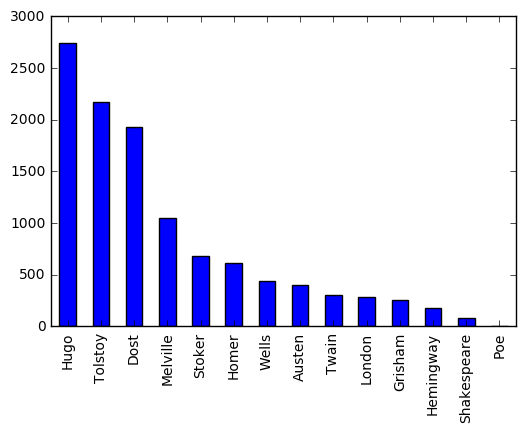

In [59]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# get a feel for the distribution
complete_set['Author'].value_counts().plot(kind='bar')

In [60]:
complete_CV = CountVectorizer(binary=False, lowercase = False, stop_words = 'english') 
complete_CV_dm = complete_CV.fit_transform(complete_set['OrigText'])
#print(complete_CV_dm.shape)

names = complete_CV.get_feature_names()
#print(type(names), len(names))

count = np.sum(complete_CV_dm.toarray(), axis = 0).tolist()
#print(type(count), len(count))
count_df = pd.DataFrame(count, index = names, columns = ['count'])

#count_df.sort_values(['count'], ascending = False).head(20)

#print(names)

In [61]:
from nltk.corpus import stopwords

nltk_stopwords = stopwords.words("english")

#print(type(nltk_stopwords))
#print(len(nltk_stopwords))
my_stopwords = nltk_stopwords + ["br", "said","Mr","It","The","Mrs","did","But","The" "0", '000', '10', '100', '11', '12', '13', '14', u'15', u'16', u'17', u'18', u'19', u'20', u'25', u'30', u'40', u'50', u'500', u'60']
#print(len(my_stopwords))

In [62]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# instantiate vectorizer(s)
cv1 = CountVectorizer(lowercase=False, 
                     stop_words=my_stopwords,
                     binary=False,
                     max_df=0.95, 
                     min_df=0.05,
                     ngram_range = (1,1)) 
tfidf1 = TfidfVectorizer(lowercase=False, 
                        stop_words= my_stopwords, 
                        max_df=0.95, 
                        min_df=0.1,
                        ngram_range = (1,1)) 

choice = TfidfVectorizer(lowercase = False,
                         stop_words = my_stopwords,
                         binary=True,
                         max_df=.92,
                         min_df=.1,
                         ngram_range = (1,1)) #choose your favorite parameter combination

# fit and transform text
cv_dm = cv1.fit_transform(complete_set['OrigText'])
tfidf_dm = tfidf1.fit_transform(complete_set['OrigText'])
choice_dm = choice.fit_transform(complete_set['OrigText'])

In [63]:
from sklearn.cross_validation import train_test_split

X = cv_dm.toarray()  #remember this is the output from the vectorizer and we are turning it into an array
#print(type(X), X[0:10])


y = complete_set['Author'].values #this is an array of labels
#print(type(y), y[0:10])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# fit a CART model to the data
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

# make predictions
clf1_expected = y_test
clf1_predicted = model.predict(X_test)


print(model.score(X_test,y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf1_expected, clf1_predicted)))
print(metrics.classification_report(clf1_expected, clf1_predicted))

0.813473053892
accuracy: 0.813473053892
             precision    recall  f1-score   support

     Austen       0.57      0.56      0.57       119
       Dost       1.00      1.00      1.00       604
    Grisham       0.44      0.37      0.40        68
  Hemingway       0.53      0.35      0.42        48
      Homer       0.74      0.82      0.78       190
       Hugo       0.80      0.78      0.79       819
     London       0.22      0.23      0.23        70
   Melville       1.00      1.00      1.00       317
        Poe       0.00      0.00      0.00         1
Shakespeare       0.17      0.16      0.16        25
     Stoker       1.00      1.00      1.00       207
    Tolstoy       0.84      0.86      0.85       669
      Twain       0.62      0.64      0.63        73
      Wells       0.34      0.36      0.35       130

avg / total       0.81      0.81      0.81      3340

